<BarContainer object of 5 artists>

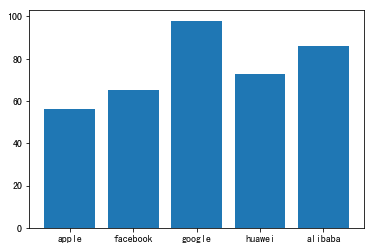

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

position = ['apple', 'facebook', 'google', 'huawei', 'alibaba']
data = [56, 65, 98, 73, 86]
plt.bar(x=position, height=data)

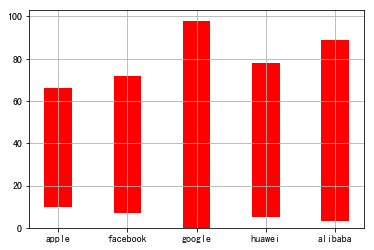

In [2]:
plt.bar(x=position, height=data, width=0.4, bottom=[10,7,0,5,3], color='red', linewidth=5)
plt.grid(True)

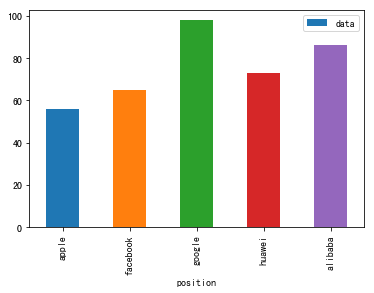

In [3]:
df = pd.DataFrame({"position":position, 'data':data})
df.plot.bar(x='position', y='data')

In [5]:
import tushare as ts
box_office = pd.DataFrame()
for y in range(2010, 2019):    # 2010年(含)至2018年(含)
    ym = str(y) + '-8'
    df = ts.month_boxoffice(ym)
    box_office[ym] = df['boxoffice']
box_office

,2010-8,2011-8,2012-8,2013-8,2014-8,2015-8,2016-8,2017-8,2018-8
0,26918,39162,27993,63665,39313,73427,97175,424006,132371
1,17760,30890,23051,29567,36338,54977,54091,53419,122093
2,8816,22919,15020,29460,28981,48912,38675,49087,102860
3,8125,17219,14636,17121,20807,20948,37911,34147,68479
4,5157,6243,13518,16468,18746,19542,34589,29012,55531
5,5133,5326,8895,14473,18714,18083,25505,23652,32123
6,3980,3594,7037,11416,16926,17220,15886,16825,23000
7,2655,3410,6868,7542,9770,14643,15281,15806,19604
8,2581,3301,4159,6286,9729,14458,14720,12588,17865
9,2233,1954,3471,5440,9464,9977,8204,11341,15308


In [6]:
box_office = box_office.astype(np.int)    # 将数据类型转化为整数型
total = box_office.sum()
total

2010-8     91603
2011-8    147155
2012-8    141864
2013-8    226112
2014-8    262214
2015-8    361763
2016-8    391362
2017-8    736595
2018-8    683523
dtype: int64

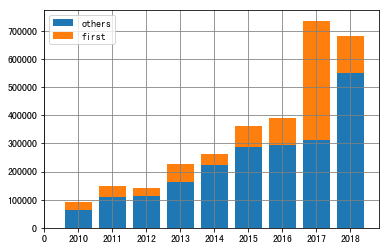

In [7]:
import matplotlib.ticker as ticker

first = box_office.loc[0].astype(np.int)    # 历年票房第一
after_first = total - first    # 其它影片票房收入

date_index = pd.to_datetime(total.index)
fig, ax = plt.subplots()
ax.grid(color='gray')

ax.bar(range(1, 10), after_first.values, label='others')    # ①
ax.bar(range(1, 10), first.values, bottom=after_first.values, label='first')    # ②

ax.set_xticks(range(0, 10))   # ③
ax.xaxis.set_major_formatter(ticker.IndexFormatter([0]+date_index.year.tolist()))    # ④

plt.legend(loc=0)

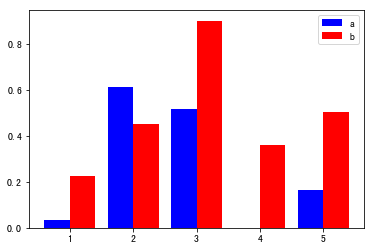

In [8]:
position = np.arange(1, 6)
a = np.random.random(5)
b = np.random.random(5)

total_width = 0.8    
n = 2
width = total_width / n
position = position - (total_width - width) / n    # ⑤

plt.bar(position, a, width=width, label='a', color='b')    # ⑥
plt.bar(position + width, b, width=width, label='b', color='r')    # ⑦

plt.legend(loc=0)

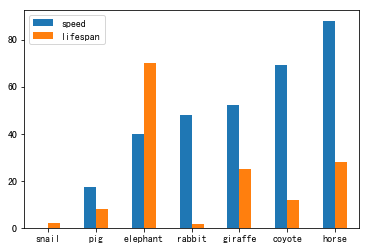

In [9]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

(-1.25, 1.25)

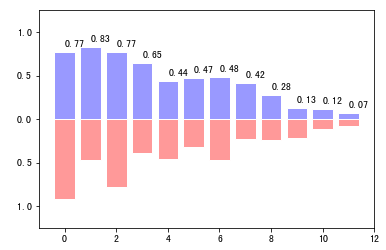

In [10]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)

<BarContainer object of 5 artists>

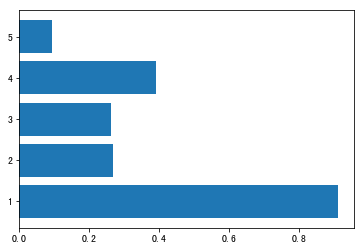

In [11]:
position = np.arange(1, 6)
a = np.random.random(5)
plt.barh(position, a)

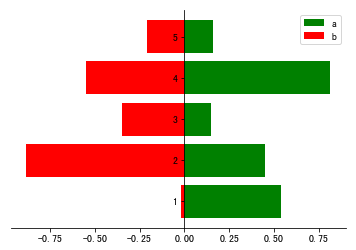

In [12]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

position = np.arange(1, 6)
a = np.random.random(5)
b = np.random.random(5)

plt.barh(position, a, color='g', label='a')
plt.barh(position, -b, color='r', label='b')

plt.legend(loc=0)

ax = plt.gca()  
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0)) 

Text(0.5, 0, 'Z')

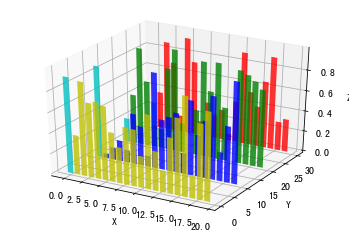

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')    # ⑧
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [15]:
df = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/school/school.csv")
df.sample(5)

,School,Women,Men,Gap
7,Tufts,76,112,36
14,Cornell,80,107,27
5,Chicago,78,118,40
11,Dartmouth,84,114,30
18,Emory,68,82,14


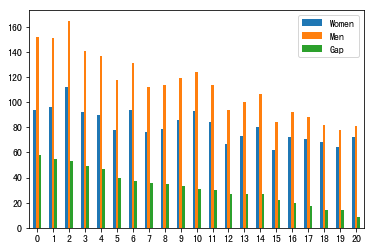

In [16]:
df.plot.bar(rot=0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, '毕业学校')

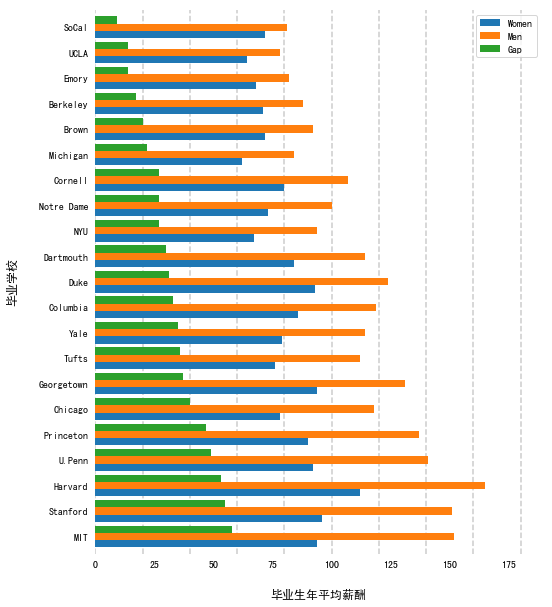

In [17]:
from matplotlib.ticker import StrMethodFormatter

ax = df.plot(kind='barh', x='School', figsize=(8, 10), zorder=2, width=0.85)    # ⑨

#隐藏坐标轴
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# 设置刻度
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# 绘制垂直横轴的虚线
vals = ax.get_xticks()    # ⑩
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='grey', zorder=1)

ax.set_xlabel("毕业生年平均薪酬", labelpad=20, weight='bold', size=12)
ax.set_ylabel("毕业学校", labelpad=20, weight='bold', size=12)